**Group Members: ** Andre Andrada and Kristine Valenzuela

# Introduction
Everybody wants to be famous nowadays. In an era where anything can go viral, Youtube is a major source of stars. Our group wanted to help those hopefuls reach their goals of stardom so we decided to analyze Trending Youtube Video Statistics from November 2017 - June 2018 to see the type of content that someone should produce in order to gain the most attention. The follow is the steps that we will be taking to reach that conclusion:


1. Analyze the frequency of categories to make a prediction
2. Begin to look at the top 100 videos to have a smaller sample size
3. Identify the top 5 categories within those 100 videos
4. Examine the category that stands out as having the most reliable incline
5. Sort the videos in that category by views
6. Manually evaluate which types of topics reliable make it to the top of the category
7. Use this information to begin your rise to popularity

The data set we use includes data from 2017 and 2018, but we will only be using data from 2018. This is because the data set of all trending videos would be too large to process efficiently. The type of content that is trending on Youtube is always changing so the popular videos from 2017 would not be very useful for predicting trending content in 2019.




# Data Curation and Parsing

We first start by taking a look at the data and understand what data is relevant. We start to eliminate the information that we don't need to analyze, which includes the 

**"video_id"** - We don't include the "video_id" because that only shows the random letter and number combination assigned to the video. 

**"publish_time"** - By the time a video become trending, it has already been up for a period of time. The initial time that it was published become irrelevant.

**"thumbnail_link"** - Similar to the video title, the picture associated with the video could be misleading and because each one is different, would not be useful.

**"comments_disabled"** - Comments were only disabled on a few videos and are a preference of the publisher. There isn't a large enough sample size to make an assumption about the group because of this.

**"ratings_disabled"** - Similar to the comments, there is not a large enough sample size to find a trend about the larger group.

**"video_error_or_removed"** - Rare occurrence similar to comments and ratings.

**"description"** - The description varies from video to video and while it can potentially contain valuable information, there is not always a thought out description and the information sometimes requires the viewer to watch the video for context. 



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


data = pd.read_csv("USvideos.csv")
temp = data.head()
columns = ['video_id', 'publish_time', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']
data.drop(columns, inplace=True, axis=1)

data
#If index is greater than 9602
#i = 15398

#data.drop(data.head(15398).index,inplace=True)
#data

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518
5,17.14.11,2 Weeks with iPhone X,iJustine,28,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434
6,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970
7,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432
8,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340
9,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368


## Frequency of Top Categories

We then take this information and analyze the frequency of each category occurring in the trending videos. We suspect that this will help us narrow our seach when deciding on which type of topic we should focus on to gain popularity.

We were able to get the category numbers from

https://gist.github.com/dgp/1b24bf2961521bd75d6c

24 - Entertainment \\
10 - Music \\
26 - Howto & Style \\
23 - Comedy \\
22 - People and Blogs \\
25 - News & Politics \\
28 - Science and Technology \\
1 - Film and Animation \\
17 - Sports \\
27 - Education \\
15 - Pets and Animals \\
20 - Gaming \\
19 - Travel & Events \\
2 - Autos & Vehicles \\
29 - Nonprofits & Activism \\
43 - Shows \\

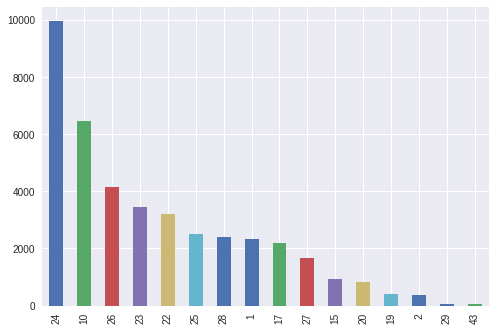

In [0]:
fig, ax = plt.subplots()
data['category_id'].value_counts().plot(ax=ax, kind='bar')


plt.show()
 
# objects = data['category_id']
# ax = temp['category_id'].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
#temp.plot(kind='bar',x='category_id')

 
#plt.show()

We then take this information begin to analyze the top 10 categories of videos. This is how we would try to see if we noticed any categories as having a linear regression line that stands out from the other categories. We then hope to take that category and start analyzing the topics within it to see if any topics begin to stand out as having more success than others. 

Before we begin creating a chart and analyzing it, we first want to make sure that each row has an index attached to it. This is because in case we want to access the rows in any sort of chronological order, we will be able to do that even after breaking it down into different sections. We plan on breaking it down into sections because trying to analyze all the video data is predicted to be too much.

## Top Ten Categories Information

In [0]:
top_ten = data.copy()
top_ten['index'] = 0
index = 0

for (x,y) in data.iterrows():
  top_ten.iloc[x,8] = index
  index+=1
top_ten

,trending_date,channel_title,category_id,tags,views,likes,dislikes,comment_count,index
0,17.14.11,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,0
1,17.14.11,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,1
2,17.14.11,Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,2
3,17.14.11,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,3
4,17.14.11,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,4
5,17.14.11,iJustine,28,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,5
6,17.14.11,Saturday Night Live,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,6
7,17.14.11,CrazyRussianHacker,28,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,7
8,17.14.11,20th Century Fox,1,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,8
9,17.14.11,Vox,25,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,9


# Top 100 videos from full dataset


## Frequency of Top Categories

Because we are discussing a fast rise to popularity, we began to narrow down the data and analyze just the top 100 videos. We then turn that information into a bar graph to see the frequency of the categories within the set of the most viewed videos of the time period. 

### Information of Top 100 Videos

In [3]:
top100 = data.copy()
top100 = top100.sort_values('views')
top100.drop_duplicates(subset ="channel_title", keep = 'last', inplace = True) 

top100 = top100.tail(100)
print(len(top100))
top100

100


,trending_date,channel_title,category_id,tags,views,likes,dislikes,comment_count
14967,18.29.01,Calvin Klein,24,[none],13124176,22664,17917,1990
16957,18.08.02,Intuit,28,"Intuit|""Powering Prosperity""|""Powering Prosper...",13312573,23448,8063,1794
15525,18.01.02,FiftyShadesVEVO,10,"Liam|""Payne""|""Rita""|""Ora""|""For""|""You""|""(Fifty""...",13809604,475593,9170,20933
34689,18.14.05,TWICE JAPAN OFFICIAL YouTube Channel,10,"TWICE|""トワイス""|""トゥワイス""|""ナヨン""|""ジョンヨン""|""モモ""|""サナ""|""...",13831320,395282,20532,35732
20559,18.26.02,JayRockVEVO,10,"Kendrick Lamar|""hip-hop""|""R&B""|""Black Panther""...",13882785,380406,13872,26945
34741,18.14.05,Global Road Entertainment,24,"Global Road|""Global Road Entertainment""|""Movie...",14118990,5790,593,628
34726,18.14.05,JamesBayVEVO,10,"James|""Bay""|""Us""|""Universal""|""Records""|""Altern...",14444272,115979,3509,2190
31741,18.29.04,Jason Derulo,10,"jason|""derulo""|""jason derulo""|""pop""|""other""|""o...",14487632,281374,17117,37412
37745,18.29.05,INSIDER,24,"INSIDER|""marvel""|""black panther""|""movie makeup...",14890847,142231,4647,6042
17953,18.13.02,T-Mobile,24,"best super bowl ads|""best superbowl ads""|""best...",15045586,0,0,0


### Frequency of Category In Top 100 Videos

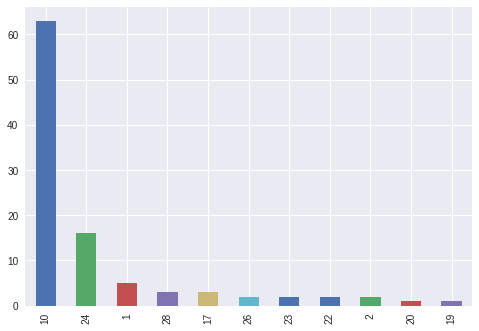

In [0]:
fig, ax = plt.subplots()
top100['category_id'].value_counts().plot(ax=ax, kind='bar')

 
plt.show()

10 - Music \\
24 - Entertainment \\
1 - Film and Animation \\
28 - Science and Technology \\
17 - Sports \\
26 - Howto & Style \\
23 - Comedy  \\
22 - People & Blogs \\
2 - Autos & Vehicles \\
20 - Gaming \\
19 - Travel & Events \\
 
After analyzing this bar graph, we see that Category 10 shows up with the highest frequency among the top 100 videos. We then plot those videos on a scatter plot to see if we can identify any larger trends over the time period.

## Scatter Plots of Top Categories

### Information for Top 5 Categories Within the Top 100 Videos

In [4]:
top_five = data.copy()
top_five['index'] = 0
index = 0

for (x,y) in data.iterrows():
  top_five.iloc[x,8] = index
  index+=1
top_five


,trending_date,channel_title,category_id,tags,views,likes,dislikes,comment_count,index
0,17.14.11,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,0
1,17.14.11,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,1
2,17.14.11,Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,2
3,17.14.11,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,3
4,17.14.11,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,4
5,17.14.11,iJustine,28,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,5
6,17.14.11,Saturday Night Live,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,6
7,17.14.11,CrazyRussianHacker,28,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,7
8,17.14.11,20th Century Fox,1,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,8
9,17.14.11,Vox,25,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,9


### Scatter Plot for Top 5 Categories to Notice Trends

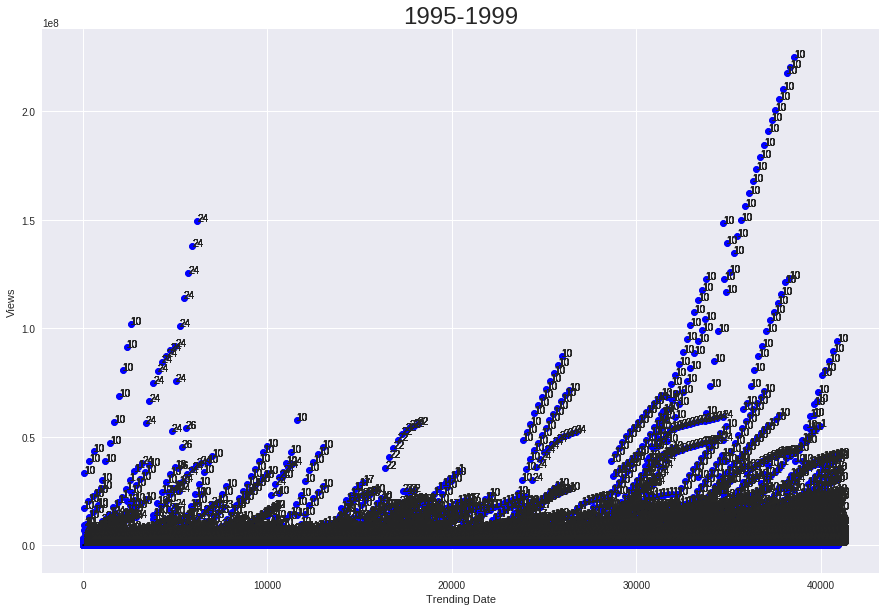

In [0]:


plt.figure(figsize=(15,10))


for cat in top_five:
  x = (top_five['index']).values
  y = top_five['views'].values
  plt.title("Views vs. Time for Categories", fontsize="24")

  plt.scatter(x, y, s=30)
  plt.xlabel("Trending Date")
  plt.ylabel("Views")
  plt.tick_params(axis='both',which='major',labelsize=10)

  for i, team_name in enumerate(top_five['category_id']):
    plt.annotate(team_name,(x[i], y[i]), size = 10)

# Linear regression with line of best fit coded below. 

fit_final = np.poly1d(np.polyfit(x,y,1)) 
plt.plot(x, y, 'ob', x, fit_final(x), '-k')


From this scatter plot, we notice that for the videos that are extremely popular and distinguish themselves among the the rest of the trending videos are Category 10 - Music. We also notice that towards the end of the graph, which is closer to the summer months, there is a large increase in the amount of music videos that are getting lots of views. This could be attributed to an increase of music released during the summer. 

Also, after viewing some of the rows above, we can also see that many of these videos are music from famous artists with professional companies producing the videos for them. Because of this, producing music content would not be a very viable option for somebody just getting started with youtube. In our next section of analysis, we analyze the five categories after music.



## Top Five Categories (After Removing Music)

In [1]:
top_five = data.copy()
top_five['index'] = 0
index = 0

for (x,y) in data.iterrows():
  top_five.iloc[x,8] = index
  index+=1
top_five



NameError: ignored

## Information for Top Five (After Removing Music)

We decided to remove the videos from Category 10 - Music because after looking at the information below, most of the videos are uploaded by VEVO channels. Vevo is 

Vevo - https://www.vevo.com/

In [6]:
top_five = data.copy()
top_five_copy = top_five.copy()
top_five['index'] = 0
top_five_copy['index'] = 0
index = 0

for (x,y) in data.iterrows():
  top_five.iloc[x,8] = index
  top_five_copy.iloc[x,8] = index
  index+=1
top_five

,trending_date,channel_title,category_id,tags,views,likes,dislikes,comment_count,index
0,17.14.11,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,0
1,17.14.11,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,1
2,17.14.11,Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,2
3,17.14.11,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,3
4,17.14.11,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,4
5,17.14.11,iJustine,28,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,5
6,17.14.11,Saturday Night Live,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,6
7,17.14.11,CrazyRussianHacker,28,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,7
8,17.14.11,20th Century Fox,1,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,8
9,17.14.11,Vox,25,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,9


## Information For Top Five (November - December)

When deciding how to refine the data further, we removed everything below 5 million views. We wanted to analyze the top of the trending videos to see what is actually making it to the top of the top. 

In [7]:


top_five_novdec = top_five.copy()[0:9600]
top_five_novdec = top_five_novdec.drop(top_five_novdec[(top_five_novdec.category_id != 24) & (top_five_novdec.category_id != 1) & \
(top_five_novdec.category_id != 28) & (top_five_novdec.category_id != 17) & (top_five_novdec.category_id != 26) ].index)

top_five_novdec = top_five_novdec.drop(top_five_novdec[(top_five_novdec.views < 5000000)].index)

top_five_novdec


,trending_date,channel_title,category_id,tags,views,likes,dislikes,comment_count,index
69,17.14.11,John Lewis,26,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,69
329,17.15.11,John Lewis,26,"christmas|""john lewis christmas""|""john lewis""|...",7563254,58209,10859,7120,329
423,17.16.11,BostonDynamics,28,"Robots|""Boston Dynamics""|""SpotMini""|""Legged Lo...",5531707,72727,3362,14816,423
454,17.16.11,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",5086221,137819,10468,18395,454
569,17.16.11,John Lewis,26,"christmas|""john lewis christmas""|""john lewis""|...",7727696,59673,11124,7350,569
603,17.17.11,20th Century Fox,1,"Trailer|""Deadpool""|""20th Century Fox (Producti...",6659676,223821,4515,11792,603
693,17.17.11,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",5392036,142006,10797,18930,693
791,17.17.11,John Lewis,26,"christmas|""john lewis christmas""|""john lewis""|...",8041928,60434,11437,7545,791
800,17.18.11,BostonDynamics,28,"Robotics|""Humanoid Robots""|""Legged Locomotion""...",6451949,150015,2976,26863,800
802,17.18.11,Warner Bros. Pictures,24,"Rampage|""Rampage the Movie""|""The Rock""|""Dwayne...",7797259,94545,8233,17122,802


## Scatter Plot and Regression Line For Top Five (November - December)

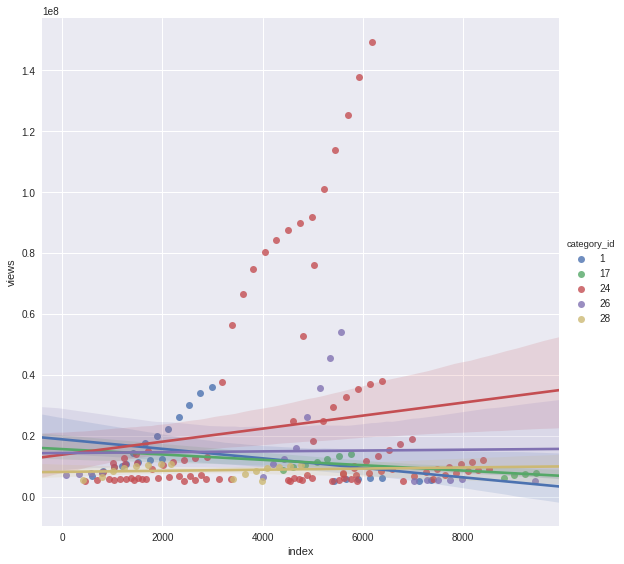

In [20]:


sns.lmplot(x="index", y="views", hue="category_id", data=top_five_novdec, size=8)


**Analysis on November - December**


After looking at this linear model, we see that Category 24 - Entertainment has the highest sloping. This is largely because of the viral video whose numbers reach the top of the graph. 

## Scatter Plot and Regression Line For Top Five (January - February)

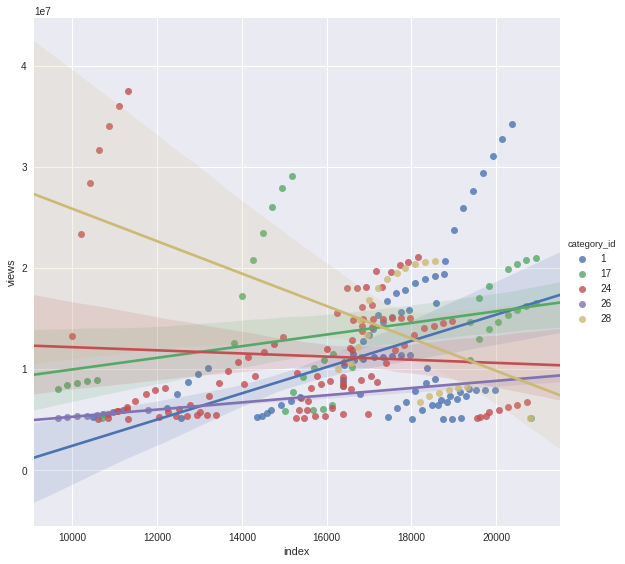

In [9]:


top_five_janfeb = top_five.copy()[9602:20968]
top_five_janfeb = top_five_janfeb.drop(top_five_janfeb[(top_five_janfeb.category_id != 24) & (top_five_janfeb.category_id != 1) & \
(top_five_janfeb.category_id != 28) & (top_five_janfeb.category_id != 17) & (top_five_janfeb.category_id != 26) ].index)

top_five_janfeb = top_five_janfeb.drop(top_five_janfeb[(top_five_janfeb.views < 5000000)].index)

sns.lmplot(x="index", y="views", hue="category_id", data=top_five_janfeb, size=8)



**Analysis on January - February**

During the period of January - February, there are large changes between the regression lines. Category 1 - Film & Animation and Category 17 - Sports had a drastic increase when compared to the steady decline that it had in November - December. Category 26 - Howto & Style continued with a steady increase, but          Category 24 - Entertainment and Category 28 - Science & Technology had a decrease. 

## Scatter Plot and Regression Line For Top Five (March - April)

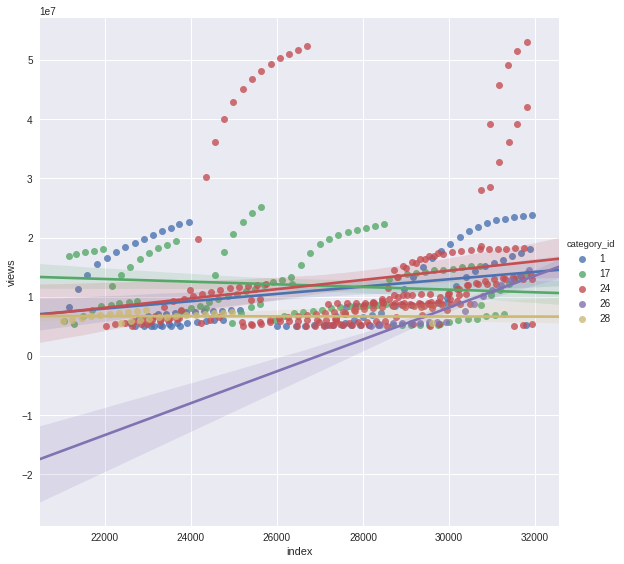

In [10]:


top_five_marapr = top_five.copy()[20969:31951]
top_five_marapr = top_five_marapr.drop(top_five_marapr[(top_five_marapr.category_id != 24) & (top_five_marapr.category_id != 1) & \
(top_five_marapr.category_id != 28) & (top_five_marapr.category_id != 17) & (top_five_marapr.category_id != 26) ].index)

top_five_marapr = top_five_marapr.drop(top_five_marapr[(top_five_marapr.views < 5000000)].index)

sns.lmplot(x="index", y="views", hue="category_id", data=top_five_marapr, size=8)



**Analysis on March - June ** \\
The one thing to notice here is that if you briefly look at the chart, Category 26 - Howto & Style looks like it has a drastic increase in popularity among the top of the trending videos, but upon further inspection, it is because there are few Howto & Style videos when compared to the other categories. 

## Scatter Plot and Regression Line For Top Five (July - August)

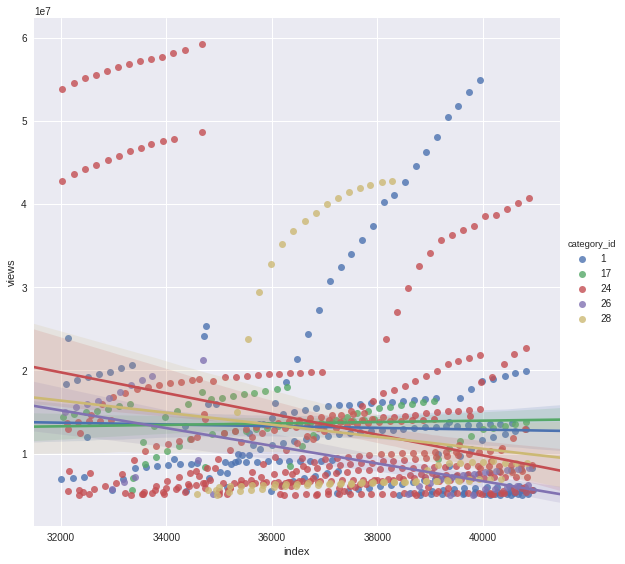

In [11]:


top_five_mayjun = top_five.copy()[31952:40950]
top_five_mayjun = top_five_mayjun.drop(top_five_mayjun[(top_five_mayjun.category_id != 24) & (top_five_mayjun.category_id != 1) & \
(top_five_mayjun.category_id != 28) & (top_five_mayjun.category_id != 17) & (top_five_mayjun.category_id != 26) ].index)

top_five_mayjun = top_five_mayjun.drop(top_five_mayjun[(top_five_mayjun.views < 5000000)].index)

sns.lmplot(x="index", y="views", hue="category_id", data=top_five_mayjun, size=8)



**Analysis on May - April** \\
Towards the summer videos, all of the categories other than Category 17 - Sports has a decline. It has shown to be the least dynamic among all of the different categories.

## Scatter Plot and Regression Line For Top Five Categories November - June(Total Time)

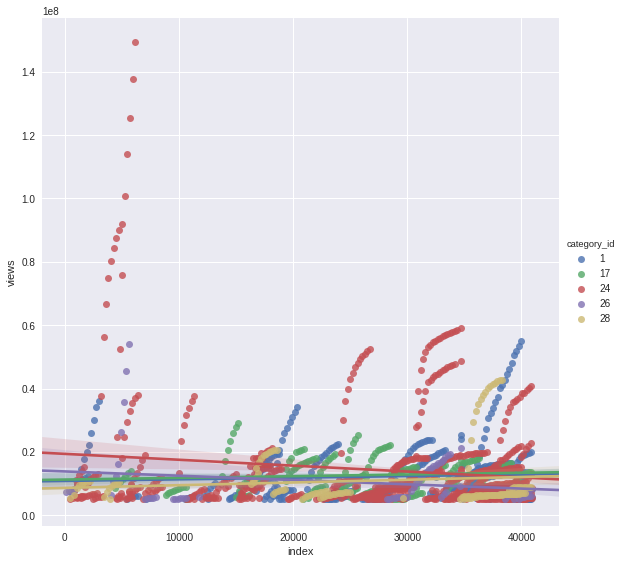

In [12]:


top_five_copy = top_five_copy.drop(top_five_copy[(top_five_copy.category_id != 24) & (top_five_copy.category_id != 1) & \
(top_five_copy.category_id != 28) & (top_five_copy.category_id != 17) & (top_five_copy.category_id != 26) ].index)

top_five_copy = top_five_copy.drop(top_five_copy[(top_five_copy.views < 5000000)].index)

sns.lmplot(x="index", y="views", hue="category_id", data=top_five_copy, size=8)



**Analysis on Graph Over Time**

After looking at the plot above, we can see the general trend and slopes of each of the top 5 categories with the highest amount of views. When we first began with the frequency of categories, one might think that entertainment is the way to go because of the consistent appearance of trending videos with high view counts. However, we notice from the given linear regression lines that there is a pretty significant decline in the trending views of these entertainment videos. Entertainment has more videos that hit viral status and that can be easily observed, but that is not indicative of the larger growing trend.

We can also notice that categories with steady inclines in trending videos are sports, film and animation, and science and technology. For this analysis we are more focused on what content you need to create to make trending videos with high view counts. Therefore, from the graph above, we can see that making videos about sports will help you achieve this goal. Sports videos are steadily increasing within trending videos while also having the most amount of views in comparison to the other categories with a positive general trend.


## Information for Entire Sports Category

In [18]:
sports = data.copy()

sports['index'] = 0
index = 0

for (x,y) in sports.iterrows():
  sports.iloc[x,8] = index
  index+=1
  
sports = sports.drop(sports[sports.category_id != 17].index)
sports

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,index
10,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,10,0
42,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,[none],945,7,5,42,0
47,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,"NBA|""Basketball""|""Sports""",956169,2017,2425,47,0
48,17.14.11,Heidelberg's nifty hook-and-lateral to the lef...,D3sports.com,17,"D3sports|""NCAA Division III""|""D3sports.com""|""D...",4569,35,18,48,0
52,17.14.11,"Wildest Superstar distractions: WWE Top 10, No...",WWE,17,"wwe|""world wrestling entertainment""|""wrestling...",1044813,15397,838,52,0
56,17.14.11,JaVale McGee's Parking Lot Chronicles: Episode 3,Kevin Durant,17,"javale mcgee|""golden state warriors""|""kevin du...",162597,5734,106,56,0
173,17.14.11,James Harden Triple-Double 2017.11.09 vs Cavs ...,FreeDawkins,17,"nba|""basketball""|""dawkins""|""dawk""|""ins""|""dawki...",18573,420,10,173,0
193,17.14.11,Stephen A. Smith slams the Philadelphia 76ers ...,ESPN,17,"espn|""espn live""|""first take""|""first take espn...",470191,4037,430,193,0
194,17.14.11,"STEPH CURRY and OMRI CASSPI, postgame GSW (9-3...",LetsGoWarriors,17,"DubNation|""Golden State Warriors""|""Golden Stat...",16305,147,13,194,0
220,17.15.11,Stephen A. Smith: Jay Cutler is a 'disease' | ...,ESPN,17,"espn|""espn live""|""stephen a smith""|""stephen a....",200235,1197,108,220,0


## Scatter Plot and Regression Line For Sports Category

From this scatter plot and regression line, we are able to see the data for how steep the regression line Category 17 - Sports. 

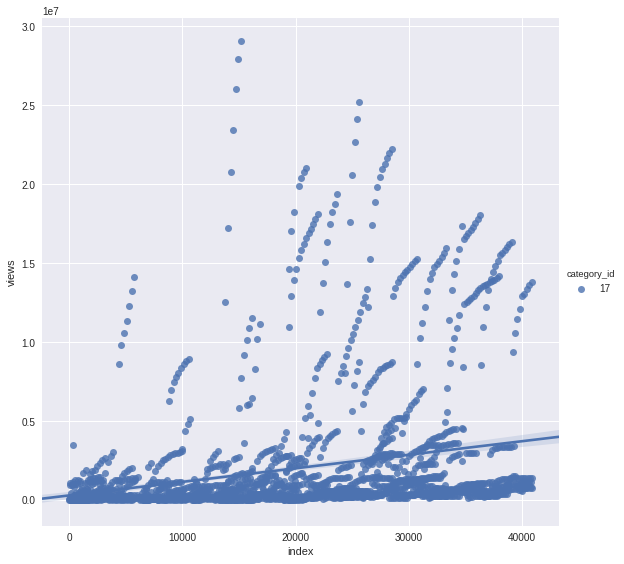

In [14]:
sns.lmplot(x="index", y="views", hue="category_id", data=sports, size=8)


## Model Scatter Plot and Regression Line For Sports Category

In [15]:

import statsmodels.formula.api as sm
pd.set_option('mode.chained_assignment', None)
e6 = sports.copy()
result2 = sm.ols(formula="views ~ index * category_id", data=e6).fit()
print (result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     135.5
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           1.99e-30
Time:                        11:53:42   Log-Likelihood:                -36077.
No. Observations:                2174   AIC:                         7.216e+04
Df Residuals:                    2172   BIC:                         7.217e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           983.3678    590.76


## Information for Sports Videos with Top Views 

In [19]:
sports = sports.sort_values('views')

sports


,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,index
14531,18.27.01,Artwork Forge,Palo Alto Online,17,[none],658,1,0,14531,0
546,17.16.11,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,17,"Oregon|""Ducks""|""college athletics""|""college fo...",687,10,2,546,0
777,17.17.11,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,17,"Oregon|""Ducks""|""college athletics""|""college fo...",704,10,2,777,0
14750,18.28.01,Artwork Forge,Palo Alto Online,17,[none],713,1,0,14750,0
14984,18.29.01,Artwork Forge,Palo Alto Online,17,[none],745,1,0,14984,0
1114,17.19.11,John Thrasher: Jimbo's here forever,Single Shot,17,"fsu|""florida state""|""Seminoles""|""Seminole""|""no...",920,3,1,1114,0
42,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,[none],945,7,5,42,0
1339,17.20.11,John Thrasher: Jimbo's here forever,Single Shot,17,"fsu|""florida state""|""Seminoles""|""Seminole""|""no...",999,3,1,1339,0
1583,17.21.11,John Thrasher: Jimbo's here forever,Single Shot,17,"fsu|""florida state""|""Seminoles""|""Seminole""|""no...",1032,3,1,1583,0
14735,18.28.01,QB Luke Falk: Need to show you're a fearless p...,Cleveland Browns,17,"Cleveland Browns|""NFL""",1164,11,1,14735,0


After sorting all of the trending sports videos by views we can manually see that the videos with the most amount of views are split up into two subcategories. The content of these videos are trick shot videos and highlights. "Dude Perfect" and "How Ridiculous" show up a large amount of times wthin the top viewed videos. "[Dude Perfect](https://www.youtube.com/user/corycotton/featured )" focuses on performing trickshots and "[How Ridiculous](https://www.youtube.com/user/whoisjimmy)" involved dropping items from tall heights, while trying to  An interesting thing to be noticed is that within the videos containing sports highlights, we can see that music still makes its way into our data by having a trending sports highlift focused on that.


# Conclusion

From our observations, creating videos about Sports videos would be the best way to consistently make it to the top of trending. The other categories have a more dynamic pattern, changing more between the 2 month periods. Creating quality videos showing trickshots or well editted sports highlights are two specific topics that have more popularity within the Sports category.

There can still be more analysis done on the data sets that we did not necessarily look at. After reading some of the Advice on ["8 Secrets to Grow Your Youtube Channel In 2018"](https://www.forbes.com/sites/jaysondemers/2017/12/29/8-secrets-to-grow-your-youtube-channel-in-2018-from-a-youtuber-with-over-550-million-video-views/#791c831b28de), the advice we give follows the #1 piece of advice, which is to make sure that the videos are based on a single topic/keyword. Some of the other pieces of advice that we could have analyzed with our data set would be optimize the title and description, have great thumbnails, or even encourage discussion in the comments. There are many other details we could have analyzed.

There are many other approaches that we could have taken. We could have taken the approach of looking at the like to dislike ratios to try and see which videos were overwhelmingly positive and try to sort topics through that. We also could have try looking at analyzing channels first and not the categories. Through data analysis, there are many different ways of trying to reach an end goal. In this tutorial, we wanted to focus on narrowing down the data set more and more in order to get a clear and concise answer. 

Other Resources: \\

What is Considered Trending: https://support.google.com/youtube/answer/7239739?hl=en

Dude Perfect: https://www.youtube.com/user/corycotton/featured 

How Ridiculous: https://www.youtube.com/user/whoisjimmy

MLG Highlights: https://www.youtube.com/channel/UCoh_z6QB0AGB1oxWufvbDUg

Vevo - https://www.vevo.com/



**Group Members**: Andre Andrada, Kristine Valenzuela
